# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science
## Homework 2: kNN and Linear Regression

**Harvard University**<br/>
**Fall 2021**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [1]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

<a id="instructions"></a>

<hr style="height:2pt">

### INSTRUCTIONS


- To submit your assignment follow the instructions given in Canvas.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code continues to work, restart the kernel and rerun the notebook periodically while working through this assignment. 

- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. **Please use only the libraries provided in those imports.**

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that clearly labels the output, includes a reference to the calculated value, and rounds it to a reasonable number of digits. **Do not hard code values in your printed output**. For example, this is an appropriate print statement:
```python
print(f'The R^2 is {R:.4f}')
```
- **Your plots MUST be clearly labeled and easy to read,** including clear labels for the $x$ and $y$ axes, a descriptive title ("MSE plot" is NOT a descriptive title; "95% confidence interval of coefficients of polynomial degree 5" on the other hand is descriptive), a legend when appropriate, and clearly formatted text and graphics.

<hr style="height:2pt">

In [2]:
# RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

# Import libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# Question 7 optional imports 
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

<a id="contents"></a>

## Notebook Contents

- [**PART 1 [60 pts]: Predicting the selling price of cars on CarDekho.com**](#part1)
  - [Part 1 Overview](#part1intro)
  - [Question 1: Exploratory data analysis (EDA) [10 pts]](#part1questions)
  - [Question 2: k-Nearest Neighbors [25 pts]](#part2questions)
  - [Question 3: Simple linear regression [25 pts]](#part3questions)
  - [Question 4 (required for 209a students, optional for others):  Linear regression with feature engineering [10 pts]](#part4questions)


- [**PART 2 [40 pts]: Analysis of publically available profiles on SimplyMarry.com**](#part2)
  - [Part 2 Overview](#part2intro)
  - [Question 5:   Investigating relationships of SimplyMarry.com reported attributes [25 pts]](#part5questions)
  - [Question 6:  Calculate the Gini coefficient [15 pts]](#part6questions)
  - [Question 7 (required for 209a students, optional for others):  Multi-linear regression [10 pts]](#part7questions)


## About this homework

This assignment is the first where we will go through the process of loading a dataset, splitting it in train and test sets, pre-processing it, and finally running models and evaluating our results.

We have two different datasets, one with car data in [**PART 1**](#part1) and another with data from an Indian matrimonial web site in [**PART 2**](#part2). Using these datasets, you will explore two simple methods for prediction,  **k-nearest neighbors regression (kNN)**, a *non-parametric* method, and **linear regression**, a *parametric* method.

**PLEASE NOTE:** [Question 4](#part4questions) and [Question 7](#part7questions) are **required for 209a students** and are **optional for 109a students**. 109a students are welcome to complete Q4 and Q7, if time permits, for your own learning experience. However, neither Q4 nor Q7 will be graded for 109a students and neither will not count toward your grade. On the otherhand, 209a students MUST complete Q4 and Q7, and both questions will be graded.

<a id="part1"></a>
    
# PART 1 [60 pts]: Predicting the selling price of cars on CarDekho.com

[Return to contents](#contents)

<a id="part1intro"></a>

## Overview

[Return to contents](#contents)

According to its website, **CarDekho.com** is India's leading car search venture. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons, as well as videos and pictures of all car brands and models available in India. Each car has a **current selling price**, which is the price for buying a used car on this site, and an **MRP**, which is the retail price of the car. These two prices differ depending on factors such as brand, make year, mileage, condition, etc.  

### Dataset 

The dataset contains 601 used cars and is available as `data/car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a used car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of the car when it was new (in lakhs). 
- **Kms_Driven** - number of kilometers

**NOTE:** 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

### Objective

Using kNN and linear regression we will predict the `Current_Selling_Price` from the other features available in this dataset.

<a id="part1questions"></a>

## <div class='exercise'><b> Question 1: Exploratory data analysis (EDA) [10 pts]</b></div>

[Return to contents](#contents)

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

**Load the dataset, inspect it, and answer the following questions:**

**1.1** Identify all variables in the dataset. Which ones are quantitative, and which ones are categorical? If you think any variables are categorical, briefly explain why.

**1.2** What are the means and standard deviations for `Current_Selling_Price` and `MRP`? 

**1.3** What is the range of kilometers that the cars have been driven?

**1.4** The goal of this part is to identify the best variable from which to predict our response variable `Current_Selling_Price`. 

- Plot a scatter plot between each predictor and our reponse variable and examine the relationship between the predictors and `Current_Selling_Price`.
- Based on the plots, which is the predictor that visually seems to best predict the `Current_Selling_Price`? 
    
    
**PLEASE NOTE:** In this course, you will be expected to ALWAYS label your axes, title your graphs, and produce visuals which clearly communicate the data (as described in the [Instructions](#instructions) at the start of this notebook). Visuals should often be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.

## Question 1: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

**Load the dataset, inspect it, and answer the following questions:**
    
**1.1** Identify all variables in the dataset. Which ones are quantitative, and which ones are categorical? If you think any variables are categorical, briefly explain why.

</div>

In [3]:
# your code here
# Read the data into a Pandas dataframe
df = pd.read_csv('data/car_dekho_full.csv')

# Take a quick look at the dataframe
df.head()


,Year,Current_Selling_Price,MRP,Kms_Driven
0,2016,5.25,5.70,3493
1,2005,3.51,13.70,75000
2,2010,0.31,1.05,213000
3,2006,2.10,7.60,50456
4,2005,0.20,0.57,55000


**INTERPRETATION:**

**The year is categorical because there is no intrinsic ordering to the year of the car. All other variables (selling price, MRP, and Kms driven) are quantitative since they are continous, accurate measurements of something.**

<div class='exercise-r'>  

**1.2** What are the means and standard deviations for `Current_Selling_Price` and `MRP`? 

</div>

In [4]:
# Be certain to name your variables mean_csp, mean_mrp, std_csp, std_mrp
# to match the variable names used in the provided print function

# your code here
mean_csp = df['Current_Selling_Price'].mean()
mean_mrp = df['MRP'].mean()

std_csp = df['Current_Selling_Price'].std()
std_mrp = df['MRP'].std()

# end your code here 

print(
    "\n"
    f"The mean Current Selling Price is {mean_csp:.4f} lakhs\n"
    f"The mean MRP is {mean_mrp:.4f} lakhs\n"
    f"The Standard Deviation of Current Selling Price is {std_csp:.4f}\n"
    f"The Standard Deviation of MRP is {std_mrp:.4f}"
)


The mean Current Selling Price is 4.3931 lakhs
The mean MRP is 6.9116 lakhs
The Standard Deviation of Current Selling Price is 4.5183
The Standard Deviation of MRP is 6.4801


<div class='exercise-r'>  

**1.3** What is the range of kilometers that the cars have been driven?

</div>

In [5]:
# your code here
print(
    "\n"
    f"The range of kilometers that the cars have been driven is {df['Kms_Driven'].min():.1f} to {df['Kms_Driven'].max():.1f} kms.")


The range of kilometers that the cars have been driven is 500.0 to 213000.0 kms.


<div class='exercise-r'>  

**1.4** The goal of this part is to identify the best variable from which to predict our response variable `Current_Selling_Price`. 

- Plot a scatter plot between each predictor and our reponse variable and examine the relationship between the predictors and `Current_Selling_Price`.
- Based on the plots, which is the predictor that visually seems to best predict the `Current_Selling_Price`? 
    
    
**PLEASE NOTE:** In this course, you will be expected to ALWAYS label your axes, title your graphs, and produce visuals which clearly communicate the data (as described in the [Instructions](#instructions) at the start of this notebook). Visuals should often be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.

</div>

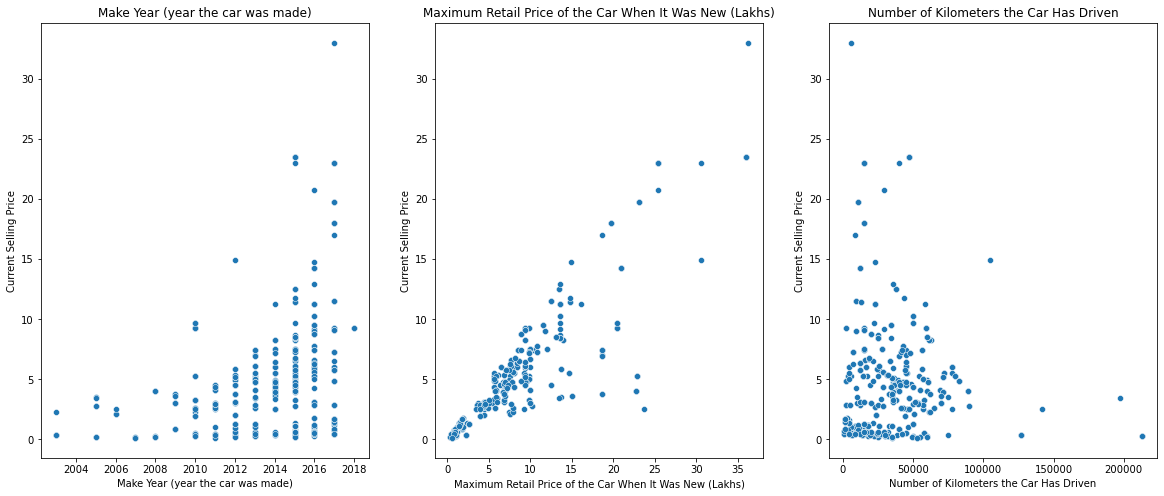

In [6]:
# your code here
df['Year'] = df['Year'].astype(pd.api.types.CategoricalDtype(ordered = False))

names_dict = {'Current_Selling_Price' : 'Current Selling Price',
              'Year' : 'Make Year (year the car was made)',
              'MRP' : 'Maximum Retail Price of the Car When It Was New (Lakhs)',
              'Kms_Driven' : 'Number of Kilometers the Car Has Driven'}

count=1
plt.subplots(figsize=(20, 8))
for i in df.columns:
    if i == 'Current_Selling_Price':
        continue
    plt.subplot(1,3,count)
    sns.scatterplot(data=df, x=i, y='Current_Selling_Price')  

    plt.xlabel(names_dict[i])    
    plt.ylabel(names_dict['Current_Selling_Price'])
    plt.title(names_dict[i])
    count+=1

plt.show()

**INTERPRETATION:**

**The maximum retail price appears to have the strongest correlation with the selling price of the car. Make year is difficult to use as a predictor variable because one input has multiple outputs for selling price. Additionally, the number of kilometers driven appears to be a bad predictor variable as it has high variability and no identifiable trend.**

<a id="part2questions"></a>

## <div class='exercise'><b> Question 2:   k-Nearest Neighbors [25 pts]</b></div>

[Return to contents](#contents)

We begin our modeling with k-Nearest Neighbors (kNN) regression. For this, we will use `sklearn`'s built-in functions.

**2.1** Split the dataset into a train and test set with 75% training data and 25% testing data, using argument `random_state = 109`.

**2.2** Now, we will fit several kNN regression models for various values of $k$ to identify the best parameterization for our model.

- **2.2.1** For each $k$ in $k \in [1,2,3,5,7,10,50,100]$, fit a k-NN regression model to the training data with response `Current_Selling_Price` and the predictor chosen in Question 1.4. 
  - For each $k$, make a plot of reponse vs. predictor (8 plots in total, arranged in a 4×2 grid). 
  - Each plot of your 8 plots should clearly show (a) the training data and the testing data in different colors, (b) the model prediction, and (c) title, legend, and axis labels.
  - **NOTE:** Feel free to use the `plt.subplots()` code we provide to specify your 4x2 grid, unless you first try that and decide that you have a clearer, cleaner way of accomplishing this task. 
- **2.2.2** Plot the training and test $MSE$ values as a function of $k$ (1 plot in total)
- **2.2.3** Find the best model based on the test $MSE$ values.
- **2.2.4** Evaluate and report the $R^2$ of the best model.


**2.3** Discuss your results by answering the following questions.  You should answer the questions directly in the provided markdown cells of your notebook.

- **2.3.1** How does the value of $k$ affect the fitted model?
- **2.3.2** If $n$ is the number of observations in the training set, what can you say about a kNN regression model that uses $k = n$?  
- **2.3.3** Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.
- **2.3.4** Try rerunning the same code by changing the random seed during the train-test split (just be certain to return it to `random_state = 109` and then rerun it prior to moving on to Question 3). Do you always get the same answer? If not, why?

## Question 2: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

**2.1** Split the dataset into a train and test set with 75% training data and 25% testing data, using argument `random_state = 109`.

</div>

In [7]:
# your code here
x = df[['MRP']]
y = df['Current_Selling_Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state=109)

<div class='exercise-r'>  

**2.2** Now, we will fit several kNN regression models for various values of $k$ to identify the best parameterization for our model.
    
- **2.2.1** For each $k$ in $k \in [1,2,3,5,7,10,50,100]$, fit a k-NN regression model to the training data with response `Current_Selling_Price` and the predictor chosen in Question 1.4. 
  - For each $k$, make a plot of reponse vs. predictor (8 plots in total, arranged in a 4×2 grid). 
  - Each plot of your 8 plots should clearly show (a) the training data and the testing data in different colors, (b) the model prediction, and (c) title, legend, and axis labels.
  - **NOTE:** Feel free to use the `plt.subplots()` code we provide to specify your 4x2 grid, unless you first try that and decide that you have a clearer, cleaner way of accomplishing this task. 

</div>

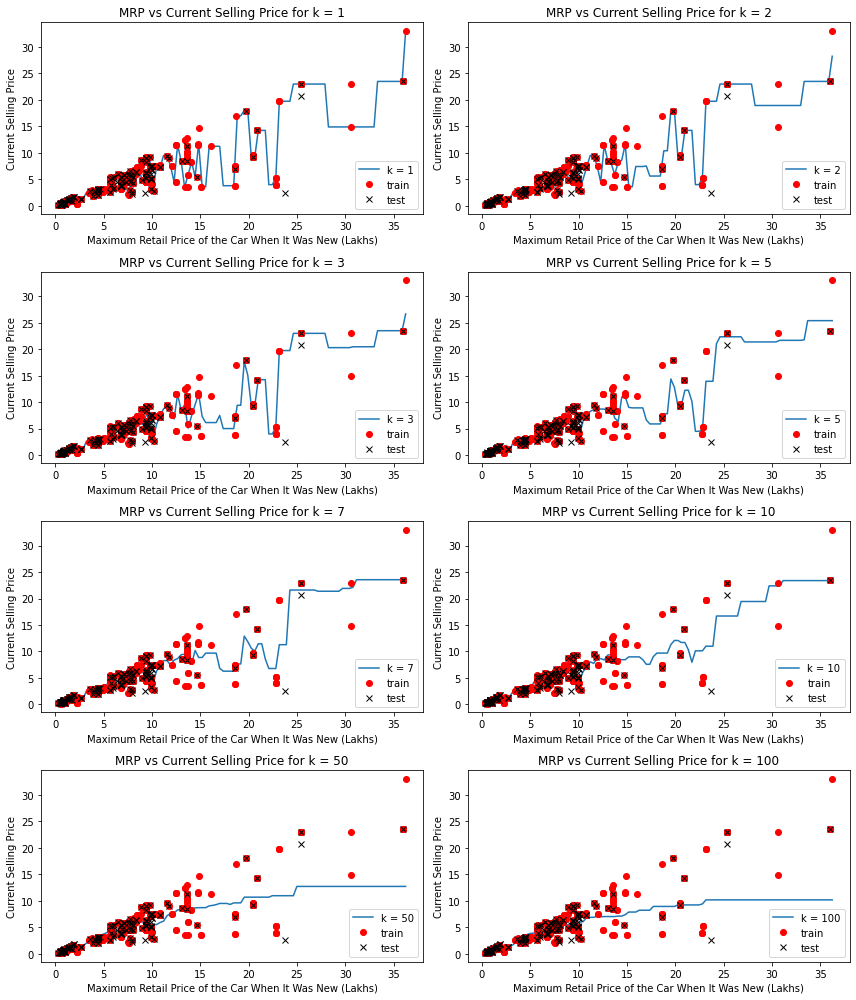

In [8]:
fig, axs = plt.subplots(4,2, figsize=(12, 14))
fig.subplots_adjust(hspace = .5, wspace=.3)

# your code here
k_list = [1,2,3,5,7,10,50,100]

# Create a dictionary to store the k value against MSE fit {k: MSE@k} 
knn_dict_test = {}
knn_dict_train = {}

# Variable used to alter the linewidth of each plot
j=0

plot_indices = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(3,0),(3,1)]

# Loop over all k values
for k_value in k_list:   
    
    # Create a KNN Regression model for the current k
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    
    # Fit the model on the train data
    model.fit(x_train,y_train)
    
    # Use the trained model to predict on the test data
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    # Calculate the MSE of the test data predictions
    MSE_test = mean_squared_error(y_test,y_pred_test)
    MSE_train = mean_squared_error(y_train,y_pred_train)

    # Store the MSE values of each k value in the dictionary
    knn_dict_test[k_value] = MSE_test
    knn_dict_train[k_value] = MSE_train
    
    # Helper code to plot the data and various kNN model predictions
    xvals = np.linspace(x.min(),x.max(),100)
    ypreds = model.predict(xvals)
    axs[plot_indices[j]].plot(xvals, ypreds,'-',label = f'k = {int(k_value)}')
    axs[plot_indices[j]].plot(x_train, y_train,'o',label='train',color='r')
    axs[plot_indices[j]].plot(x_test, y_test,'x',label='test',color='k')
    axs[plot_indices[j]].legend(loc='lower right')
    axs[plot_indices[j]].set_xlabel(names_dict['MRP'])
    axs[plot_indices[j]].set_ylabel(names_dict['Current_Selling_Price'])
    title = "MRP vs Current Selling Price for k = " + str(k_value)
    axs[plot_indices[j]].set_title(title)
    plt.tight_layout()
    j+=1


<div class='exercise-r'>  

**2.2.2** Plot the training and test $MSE$ values as a function of $k$ (1 plot in total)

</div>

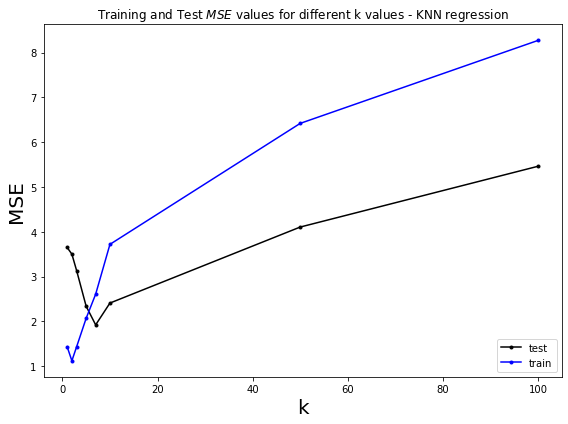

In [9]:
# your code here

# Plot a graph which depicts the relation between the k values and MSE
plt.figure(figsize=(8,6))
plt.plot(knn_dict_test.keys(), knn_dict_test.values(),'k.-', label='test')
plt.plot(knn_dict_train.keys(), knn_dict_train.values(),'b.-', label='train')

# Set the title and axis labels
plt.xlabel('k',fontsize=20)
plt.ylabel('MSE',fontsize = 20)
plt.title('Training and Test $MSE$ values for different k values - KNN regression')
plt.legend(loc='lower right')

plt.tight_layout()



<div class='exercise-r'>  

**2.2.3** Find the best model based on the test $MSE$ values.

</div>

In [10]:
# your code here
# Find the lowest MSE among all the kNN models
min_mse = min(knn_dict_test.values())

# Use list comprehensions to find the k value associated with the lowest MSE
best_model = [key  for (key, value) in knn_dict_test.items() if value == min_mse]

# Print the best k-value
print ("The best k value is ",best_model,"with a MSE of ", min_mse)

The best k value is  [7] with a MSE of  1.9218710771725909


<div class='exercise-r'>  

**2.2.4** Evaluate and report the $R^2$ of the best model.

</div>

In [11]:
# your code here
# Helper code to compute the R2_score of your best model
model = KNeighborsRegressor(n_neighbors=best_model[0])
model.fit(x_train,y_train)
y_pred_test = model.predict(x_test)

# Print the R2 score of the model
print(f"The R2 score of the best model is {r2_score(y_test, y_pred_test)}")

The R2 score of the best model is 0.88067733251126


<div class='exercise-r'>  

**2.3** Discuss your results by answering the following questions.  You should answer the questions directly in the provided markdown cells of your notebook.

**2.3.1** How does the value of $k$ affect the fitted model?

</div>

**The value of k determines how many neighbors we are accounting for when determing our predictions of the current selling price. As we increase the number of neighbors we get a more generalized model. Finding the correct k is a matter of finding a model that is not under fitted or over fitted.**



<div class='exercise-r'>  

**2.3.2** If $n$ is the number of observations in the training set, what can you say about a kNN regression model that uses $k = n$?

</div>

**If we are taking into account all observations for our nearest neighbors then our model will just be the same prediction for every value of x and that prediction will simply be the average of all the observations.**


<div class='exercise-r'>  

**2.3.3** Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.

</div>

**Our training MSE plot will perform quite well for lower values of k as we are overfitting the model for that training data. On the flip side the test MSE plot does not perform well because the model is overfitted. However, both training and test MSE perform worse as k increases because the model is becoming more and more generalized and is simply becoming a closer approximation of the mean of the training observations.**


<div class='exercise-r'>  

**2.3.4** Try rerunning the same code by changing the random seed during the train-test split (just be certain to return it to `random_state = 109` and then rerun it prior to moving on to Question 3). Do you always get the same answer? If not, why?

</div>

**By changing the random_state we definitely get different answers. This is because that random_state is determining how we are dividing up our dataset into test and train data. That largely impacts how our model will be trained and developed as certain data points will be included (or excluded) from the model.**


<a id="part3questions"></a>

## <div class='exercise'><b>Question 3:  Simple linear regression [25 pts]</b></div>

[Return to contents](#contents)

**3.1** We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression. You will use the same 75% training and 25% testing split of the data, using the same `random_state = 109`.

- **3.1.1** Run a linear regression model.
- **3.1.2** Report the slope/coefficient and intercept values for the fitted linear model.
- **3.1.3** Report the $MSE$ for the training and test sets and the $R^2$ for the test set.
- **3.1.4** Plot the **residuals**, $e = y - \hat{y}$, of the model on the training set as a function of the **response** variable. Draw a horizontal line denoting the zero residual value on the $y$-axis.

**NOTE:** Use the `sklearn` module for linear regression. Instantiate a `LinearRegression` model object, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. As previously, you may use the `mean_squared_error` function to compute $MSE$.
    
**3.2** Discuss your results by answering the following questions.  

- **3.2.1** How does the test $MSE$ score compare with the best test $MSE$ value obtained with kNN regression? 

- **3.2.2** What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?

- **3.2.3** Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.

## Question 3: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

**3.1** We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression. You will use the same 75% training and 25% testing split of the data, using the same `random_state = 109`.

**3.1.1** Run a linear regression model.

- **NOTE:** Use the `sklearn` module for linear regression. Instantiate a `LinearRegression` model object, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions.

</div>

In [12]:
# your code here
model = LinearRegression()
model.fit(x_train, y_train)

y_pred_test = model.predict(x_test)


<div class='exercise-r'>  

**3.1.2** Report the slope/coefficient and intercept values for the fitted linear model.

</div>

In [13]:
# your code here
slope = model.coef_[0]
intercept = model.intercept_

print("The slope/coefficient is ",slope," with an intercept of ", intercept)

The slope/coefficient is  0.6156599214296152  with an intercept of  0.11236987692104528


<div class='exercise-r'>  

**3.1.3** Report the $MSE$ for the training and test sets and the $R^2$ for the test set.

</div>

In [14]:
# your code here 
# Compute the MSE of the predicted test values
mse_test = mean_squared_error(y_test, y_pred_test)

y_pred_train = model.predict(x_train)
mse_train = mean_squared_error(y_train, y_pred_train)

# Print the computed MSE
print(f'The train MSE is {mse_train}')
print(f'The test MSE is {mse_test}')
print(f'The R2 score for the test set is {r2_score(y_test, y_pred_test)}')

The train MSE is 4.713332797955166
The test MSE is 3.1361670521741685
The R2 score for the test set is 0.8052856808135864


<div class='exercise-r'>  

**3.1.4** Plot the **residuals**, $e = y - \hat{y}$, of the model on the training set as a function of the **response** variable. Draw a horizontal line denoting the zero residual value on the $y$-axis.

</div>

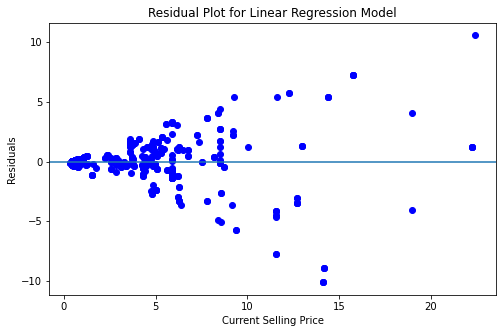

In [15]:
# your code here 
residuals = y_train - y_pred_train
fig, axes = plt.subplots(1,1,figsize=(8,5))
plt.scatter(y_pred_train, residuals, color='blue')
plt.axhline()
plt.title("Residual Plot for Linear Regression Model")
plt.ylabel('Residuals');
plt.xlabel(names_dict['Current_Selling_Price']);

<div class='exercise-r'>  

**3.2** Discuss your results by answering the following questions.

**3.2.1** How does the test $MSE$ score compare with the best test $MSE$ value obtained with kNN regression?

</div>

**The kNN regression had a smaller (ie better) MSE value than the linear regression test MSE score.**


<div class='exercise-r'>  

**3.2.2** What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?

</div>

**The positive slope means that there is a positive correlation between the predictor and response. So as the predictor increases the response also increases. As maximum retail price increases, the current selling price also increases.**


<div class='exercise-r'>  

**3.2.3** Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.

</div>

**The residuals are clustered around zero in the early values of x_train, but as the values of x increases, residuals increase. This means that our linearity assumption is most likely not accurate.**


<a id="part4questions"></a>

## <div class='exercise'><b>Question 4 (required for 209a students, optional for others):  Linear regression with feature engineering [10 pts]</b></div>

[Return to contents](#contents)

**4.1** Creating a new variable from existing data: **percentage depreciation**

Feature engineering involves transforming data into features that better represent the underlying problem for a predictive model. This typically results in improved model accuracy on unseen data. 

Our previous regression model explores the relationship between `Current_Selling_Price` (CSP) and `MRP`.

$$CSP = \beta_0 + \beta_1 \cdot MRP$$

However, this linear equation does not incorparate other interesting variables such as the year of manufacture (`Year`), or the kilometers driven (`Kms_Driven`), which may be important factors that affect the current value of the car.

Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.

From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)). 

Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.  

Define the "percentage depreciation" of the current selling price to the MRP as follows:

$$\textrm{Percentage of the Selling Price} = perc =\frac{MRP - CSP}{MRP}$$
    
Create a new column in your dataframe with each car's `perc` value.

    
**4.2** Exploratory Data Analysis

For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.

Answer the following questions by plotting graphs and including the required interpretation:

- **4.2.1** It was seen previously that there is a relationship between `Year` and `Current_Selling_Price`. Is the relationship between `Year` and `perc` the same. If not, how has it changed and why do you think so?

- **4.2.2** Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current_Selling_Price`?

- **4.2.3** Does there seem to be a relationship between `Kms_Driven` and `perc`? 

- **4.2.4** Which is the best predictor to predict `perc` (if there is one)? Is it the same as that of `Current_Selling_price` or has it changed?


**4.3** Fitting a Linear Regression model

Based on your EDA choose appropriate **predictor** variables for `perc` as your **response** variable. Use the same split train-test sets with training data of 75% and testing data of 25%.

- Fit a separate Linear Regression model for each of the predictors.
- Plot each linear model with the training and test data (in different colors with clear legends)
- Report the $MSE$ score from the training and test sets for each model.
- Find the best model (i.e. the best predictor) based on the $MSE$ of each model.


**4.4** You have now established a good linear model for **response** `perc`. At the same time, you also know the relationship between `perc` and `Current_Selling_Price`, which is the **response** that we ultimately want to model. Combining the two pieces of knowledge, what linear model can you build to model `Current_Selling_Price` directly with the predictor that models `perc` the best? Build that model and inspect the $R^2$ score of the new model on `Current_Selling_Price`. Explain the approach you have chosen to take (be explicit in your description). Is the new model better than the model you had built in [Question 3](#part3questions)?

## Question 4: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

**4.1** Creating a new variable from existing data: **percentage depreciation**

Feature engineering involves transforming data into features that better represent the underlying problem for a predictive model. This typically results in improved model accuracy on unseen data. 

Our previous regression model explores the relationship between `Current_Selling_Price` (CSP) and `MRP`.

$$CSP = \beta_0 + \beta_1 \cdot MRP$$

However, this linear equation does not incorparate other interesting variables such as the year of manufacture (`Year`), or the kilometers driven (`Kms_Driven`), which may be important factors that affect the current value of the car.

Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.

From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)). 

Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.  

Define the "percentage depreciation" of the current selling price to the MRP as follows:

$$\textrm{Percentage of the Selling Price} = perc =\frac{MRP - CSP}{MRP}$$
    
Create a new column in your dataframe with each car's `perc` value.

</div>

In [16]:
# your code here
names_dict['perc'] = "Percentage Depreciation"
perc= (df.MRP - df.Current_Selling_Price)/df.MRP
df['perc']= perc
df.head()

,Year,Current_Selling_Price,MRP,Kms_Driven,perc
0,2016,5.25,5.70,3493,0.079
1,2005,3.51,13.70,75000,0.744
2,2010,0.31,1.05,213000,0.705
3,2006,2.10,7.60,50456,0.724
4,2005,0.20,0.57,55000,0.649


<div class='exercise-r'>  

**4.2** Exploratory Data Analysis

For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.

Answer the following questions by plotting graphs and including the required interpretation:

**4.2.1** It was seen previously that there is a relationship between `Year` and `Current_Selling_Price`. Is the relationship between `Year` and `perc` the same. If not, how has it changed and why do you think so?

</div>

Text(0.5, 1.0, 'Year vs Depreciation')

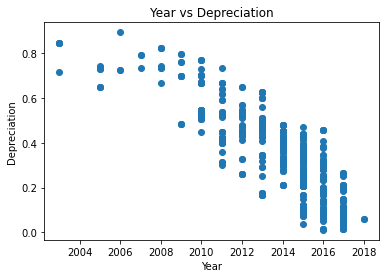

In [17]:
# your code here
plt.scatter(df.Year, df.perc)
plt.xlabel('Year')
plt.ylabel('Depreciation')
plt.title('Year vs Depreciation')

**INTERPRETATION:**

**No, the relationship isn't the same between Year and perc as it was between Year and Current_Selling_Price. We observed a positive relationship between Year and Current_Selling_Price. The relationship is negative between Depreciation and Current Selling Price. This is because as the car is newer, the drop in the value of the car is less, so there will be less depreciation (and the car will have a higher current selling price.**


<div class='exercise-r'>  

**4.2.2** Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current_Selling_Price`?

</div>

Text(0.5, 1.0, 'MRP vs Depreciation')

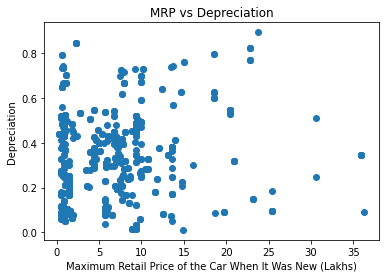

In [18]:
# your code here
plt.scatter(df.MRP, df.perc)
plt.xlabel(names_dict['MRP'])
plt.ylabel('Depreciation')
plt.title('MRP vs Depreciation')

**INTERPRETATION:**

**There is no discernable relationship between MRP and Depreciation. If anything it seems that Depreciation is uniform across MRP (which is expected since all cars depreciate in value), so the relationship between these two variables is not the same as the MRP and Current_Selling_Price which shared a positive correlation.**


<div class='exercise-r'>  

**4.2.3** Does there seem to be a relationship between `Kms_Driven` and `perc`? 

</div>

Text(0.5, 1.0, 'Kms_Driven vs Depreciation')

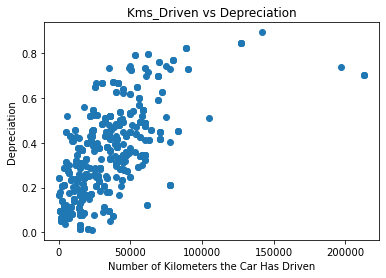

In [19]:
# your code here
plt.scatter(df.Kms_Driven, df.perc)
plt.xlabel(names_dict['Kms_Driven'])
plt.ylabel('Depreciation')
plt.title('Kms_Driven vs Depreciation')

**INTERPRETATION:**

**Yes, there does appear to be a positive relationship between Kms_Driven and perc. This is as anticipated since a car will depreciate faster the more it is driven.**


<div class='exercise-r'>  

**4.2.4** Which is the best predictor to predict `perc` (if there is one)? Is it the same as that of `Current_Selling_price` or has it changed? 

</div>

**Kms_Driven is the best predictor for perc which is different than Current_Selling_Price which was best predicted by MRP.**


<div class='exercise-r'>  

**4.3** Fitting a Linear Regression model

Based on your EDA choose appropriate **predictor** variables for `perc` as your **response** variable. Use the same split train-test sets with training data of 75% and testing data of 25%.

- Fit a separate Linear Regression model for each of the predictors.
- Plot each linear model with the training and test data (in different colors with clear legends)
- Report the $MSE$ score from the training and test sets for each model.
- Find the best model (i.e. the best predictor) based on the $MSE$ of each model.

</div>

The MSE training score for  Kms_Driven  is  0.022014942634876383
The MSE test score for  Kms_Driven  is  0.019407726530960578
The MSE training score for  Year  is  0.010839364968083132
The MSE test score for  Year  is  0.009921906416753296
The best model/predictor is  Year with an MSE of  0.009921906416753296


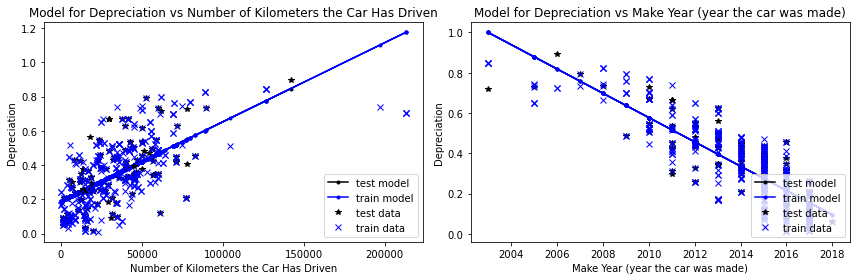

In [20]:
# your code here
# Initialize a list to store the MSE values
mse_list = []

# List of all predictor combinations to fit the curve
cols = [['Kms_Driven'],['Year']]

fig, axs = plt.subplots(1,2, figsize=(12, 4))

# Loop over all the predictor combinations 
for idx, i in enumerate(cols):

    # Set each of the predictors from the previous list as x
    x = df[i]
    
    # Set the "perc" column as the reponse variable
    y = df['perc']
   
    # Split the data into train-test sets 
    # Set random_state as 0
    x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75,random_state=109)
        
    # Initialize a Linear Regression model
    lreg = LinearRegression()

    # Fit the linear model on the train data
    lreg.fit(x_train,y_train)
    
    # Predict the response variable for the test set using the trained model
    y_pred_test = lreg.predict(x_test)
    y_pred_train = lreg.predict(x_train)
    
    # Compute the MSE for the test data
    MSE_test = mean_squared_error(y_test, y_pred_test)
    MSE_train = mean_squared_error(y_train, y_pred_train)
    
    # Append the computed MSE to the list
    mse_list.append(MSE_test)
    print ('The MSE training score for ', i[0], ' is ', MSE_train)
    print ('The MSE test score for ', i[0], ' is ', MSE_test)
    
    # Graph
    axs[idx].plot(x_test, y_pred_test,'k.-', label='test model')
    axs[idx].plot(x_train, y_pred_train,'b.-', label='train model')
    axs[idx].plot(x_test, y_test,'k*', label='test data')
    axs[idx].plot(x_train, y_train,'bx', label='train data')
    axs[idx].set_xlabel(names_dict[i[0]])
    axs[idx].set_ylabel('Depreciation')
    axs[idx].set_title('Model for Depreciation vs ' + names_dict[i[0]])
    axs[idx].legend(loc='lower right')
    plt.tight_layout()
    
mse_min = min(mse_list)
mse_index = mse_list.index(mse_min)
print('The best model/predictor is ', cols[mse_index][0], 'with an MSE of ', mse_min)

**INTERPRETATION:**

**The model with the lowest MSE is from the Year predictor which ends up being our best predictor.**


<div class='exercise-r'>  

**4.4** You have now established a good linear model for **response** `perc`. At the same time, you also know the relationship between `perc` and `Current_Selling_Price`, which is the **response** that we ultimately want to model. Combining the two pieces of knowledge, what linear model can you build to model `Current_Selling_Price` directly with the predictor that models `perc` the best? Build that model and inspect the $R^2$ score of the new model on `Current_Selling_Price`. Explain the approach you have chosen to take (be explicit in your description). Is the new model better than the model you had built in [Question 3](#part3questions)?

</div>

In [21]:
# your code here
train_data, test_data = train_test_split(df, train_size = 0.75, random_state=109)

x_train = train_data[['Year']]
x_test = test_data[['Year']]
y_train = train_data['perc']
y_test = test_data['perc']
csp_train = train_data['Current_Selling_Price']
csp_test = test_data['Current_Selling_Price']
mrp_train= train_data['MRP']
mrp_test= test_data['MRP']

# Initialize a Linear Regression model
lreg = LinearRegression()

# Fit the linear model on the train data
lreg.fit(x_train,y_train)

# Predict the response variable for the test set using the trained model
y_pred_test = lreg.predict(x_test)
y_pred_train = lreg.predict(x_train)

csp_pred_test = mrp_test - (y_pred_test * mrp_test)

print('The R2 score for ', "Year", ' is ', r2_score(csp_test, csp_pred_test))

The R2 score for  Year  is  0.9611298856039707


**INTERPRETATION:**

**Since we know the relationship between perc, MRP, and CSP we can take the results from our model of perc and year to find the predicted CSP based on the predictor variable, year. We split the entire dataset between test and train, created our perc/year linear model, and then translated the perc to CSP by taking the corresponding MRP and linear model values and putting them into the provided equation for perc. For consistency we made sure all the data was split the same way. Our R2 is better! We improved from ~0.8 to ~0.9. This is as anticpated because we are taking advantage of both MRP and Year to better inform our predicted response variable.**


<a id="part2"></a>
    
# PART 2 [40 pts]: Analysis of publically available profiles on SimplyMarry.com

[Return to contents](#contents)

<a id="part2intro"></a>

## Overview

[Return to contents](#contents)

In this part we analyze data from publically available [profiles on SimplyMarry.com](https://en.wikipedia.org/wiki/SimplyMarry), an Indian matrimonial matching portal that was closed in 2017. We will use this data to investigate relationships among various attributes reported in user profiles and examine trends embedded in this data that relate user-reported income.

### Dataset

The SimplyMarry.com data is aggregated in the file named `data/Income_prediction.csv`. All attributes in this dataset refer to traits and preferences of users looking for a spouse on SimplyMarry.com. The attributes that refer specifically to preferences, rather than traits, are clarified in the list below. 

- **age** - Age of person looking for a spouse
- **gender** - {'Female': 0, 'Male': 1} 
- **height** - Height in inches
- **bmi** - Body mass index (BMI) calculated based on height and weight
- **eating** - {'No Restrictions': 0, 'Jain': 1, 'Vegetarian': 2, 'Vegetarian With Eggs': 3, 'Non Vegetarian': 4}
- **family_type** - Family living arrangement preference of the person looking for a spouse ('Doesn't Matter': 0, 'Other': 3, 'Nuclear': 1, 'Joint family': 2}
- **status** - Social status preference of the person looking for a spouse: {'Doesn't Matter': 0, 'Middle Class': 1, 'Upper Middle Class': 2, 'High Class': 3, 'Rich / Affluent': 4}
- **manglik** - {'No': 0, 'Yes': 1, 'Do Not Know': 2} ([More on this feature](https://en.wikipedia.org/wiki/Mangala_Dosha))
- **drinking** - {'Prefers Not To Respond': 0, 'No': 1, 'Occasionally': 2, 'Yes': 3}
- **complexion** - {'Very Fair ': 1, 'Fair ': 2, 'Wheatish ': 3, 'Wheatish Medium ': 4, 'Dark': 5}
- **body** - {'Slim': 1, 'Average': 2, 'Heavy': 3, 'Athletic': 4}
- **education** - {'High School': 0, 'Some college': 1, 'Undergrad': 2, 'Grad': 3, 'Doctorate': 4}
- **city** - ('International': 1, 'Mumbai': 2, 'Delhi': 3, 'Kolkata': 4, 'Bengaluru': 5, 'Chennai': 6, 'Hyderabad': 7, 'Pune': 8, 'Ahmedabad': 9, 'Surat': 10, 'Vishakapatnam': 11, 'Others': 12)
- **income** - Annual income in dollars

**NOTE:** Within the **family_type** attribute, the 'Joint family' category denoted by a value of 2 comprises several more granular joint-family options not shown here. Those various types of joint family arrangements include 'Joint family both parents', 'Joint family only mother', 'Joint family father mother and brothers sisters', 'Joint family single parent brothers and or sisters', and 'Joint family only father', each of which has simply been aggregated under 'Joint family' in our dataset.

*Source: Harvard IACS*

### Disclaimer

This dataset is several years old and representative of profiles from a site that no longer exists. Some attributes represented in this dataset are particularly challenging to approach even with far more sophisticated analyses and nuanced considerations than we will be applying in this assignment. Extremely simple, reductive analysis on sensitive topics such as these can sometimes do more harm than good. For those reasons, please be cognizant not to draw pontentially harmful generalizations from any results or findings you generate below. We will be exploring ethics and the potential harms of biases and generalizations in data science in greater depth as we continue throughout this semester.

<a id="part5questions"></a>

## <div class='exercise'><b>Question 5: Investigating relationships of SimplyMarry.com reported attributes [25 pts]</b></div>

[Return to contents](#contents)

First we are going to use simple analytics to learn more about the relationships of different attributes in this dataset. The idea is to use basic modeling based on averages and sample distributions to uncover potential relationships in the data.

Here we will answer the below questions using plots and simple statistics.

**5.1** Is there a disparity in income of participants by gender? Consider using a log scale or another technique to communicate findings more clearly.

**5.2** Is there a relationship between income and the "eating" variable? Is there a relationship between income and skin complexion? Is it possible to consider skin complexion as an ordinal variable? For instance, consider whether retaining this ordering as in the dataset might be preferable to considering skin complexion as a categorical variable lacking order. 

**5.3** Is there a discernable trend in the incomes of participants from different regions/cities?

**5.4** Is there a clear trend between BMI and income?

**5.5** Does the level of education show a clear trend with income? Is the trend similar across both levels of the gender variable available in this dataset?

**5.6** Do any of the quantitative attributes show a clear linear or non-linear association with income?

**5.7** Is income lower or higher for those living in "nuclear" families?

**5.8** What is the average effect of the "Manglik" variable on income?


## Question 5: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

First we are going to use simple analytics to learn more about the relationships of different attributes in this dataset. The idea is to use basic modeling based on averages and sample distributions to uncover potential relationships in the data.

Here we will answer the below questions using plots and simple statistics.

**5.1** Is there a disparity in income of participants by gender? Consider using a log scale or another technique to communicate findings more clearly.

</div>

Text(0.5, 1.0, 'Gender vs Income, Female: 0, Male: 1')

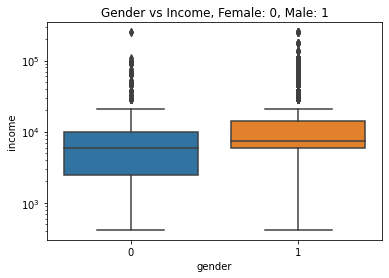

In [22]:
# your code here 
# Read the data into a Pandas dataframe
df2 = pd.read_csv('data/Income_prediction.csv')

sns.boxplot(x=df2['gender'], y=df2['income'])
plt.yscale('log')
plt.title("Gender vs Income, Female: 0, Male: 1")


**INTERPRETATION:**

**Yes, on average the income for men is higher than the income for women.**


<div class='exercise-r'>  

**5.2** Is there a relationship between income and the "eating" variable? Is there a relationship between income and skin complexion? Is it possible to consider skin complexion as an ordinal variable? For instance, consider whether retaining this ordering as in the dataset might be preferable to considering skin complexion as a categorical variable lacking order.

</div>

Text(0.5, 1.0, 'Eating vs Income')

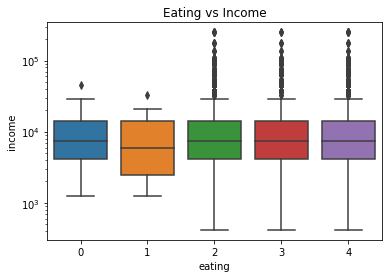

In [23]:
# your code here 
sns.boxplot(x=df2['eating'], y=df2['income'])
plt.yscale('log')
plt.title("Eating vs Income")

**INTERPRETATION:**

**No, there is no significant relationship between income and eating, since there are similar means. One exception to the rule is Jain, which has a potentially lower mean, but we are unsure if this is statistically significant.**


<div class='exercise-r'>  

**5.3** Is there a discernable trend in the incomes of participants from different regions/cities?

</div>

Text(0.5, 1.0, 'City vs Income')

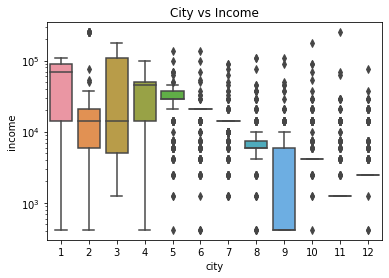

In [24]:
# your code here
sns.boxplot(x=df2['city'], y=df2['income'])
plt.yscale('log')
plt.title("City vs Income")

**INTERPRETATION:**

**Yes, on average, International, Mumbai, Delhi, Kokata, and Bengaluru have higher incomes. Pune, Ahmedabad, Surat, and Vishaka have lower incomes on average.**


<div class='exercise-r'>  

**5.4** Is there a clear trend between BMI and income?

</div>

Text(0, 0.5, 'Income')

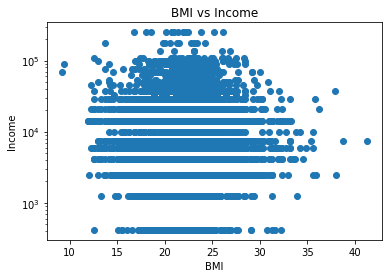

In [25]:
# your code here
plt.scatter(x=df2['bmi'], y=df2['income'])
plt.yscale('log')
plt.title("BMI vs Income")
plt.xlabel("BMI")
plt.ylabel("Income")

**INTERPRETATION:**

**There is no clear trend between BMI and income as there are not discernable patterns or relationship identifiable on this scatterplot.**


<div class='exercise-r'>  

**5.5** Does the level of education show a clear trend with income? Is the trend similar across both levels of the gender variable available in this dataset?

</div>

Text(0.5, 1.0, 'Education vs Income')

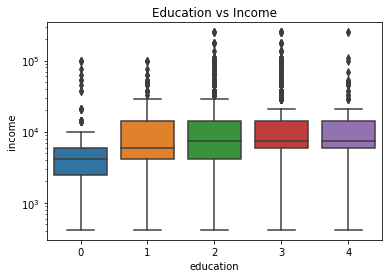

In [26]:
# your code here
sns.boxplot(x=df2['education'], y=df2['income'])
plt.yscale('log')
plt.title("Education vs Income")

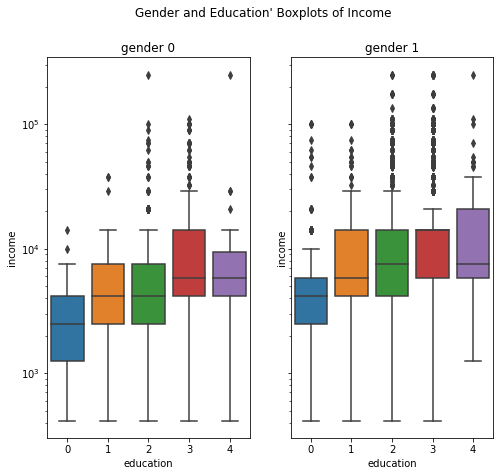

In [27]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(8,7))
axes = axes.flatten().tolist()
for gender, g in df2.groupby('gender'):
    ax = axes.pop(0)
    sns.boxplot(x=g['education'],y=g['income'], ax=ax);    
    ax.set_title(f'gender {gender}')
plt.suptitle("Gender and Education' Boxplots of Income");
plt.yscale('log');

**INTERPRETATION:**

**Yes, as level of education increases, mean income also increases. This trend also holds for both genders.**


<div class='exercise-r'>  

**5.6** Do any of the quantitative attributes show a clear linear or non-linear association with income?

</div>

Text(0, 0.5, 'Income')

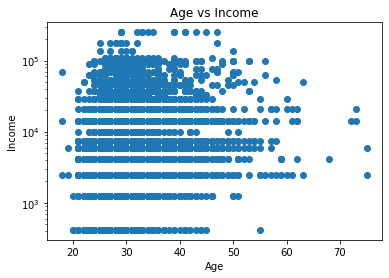

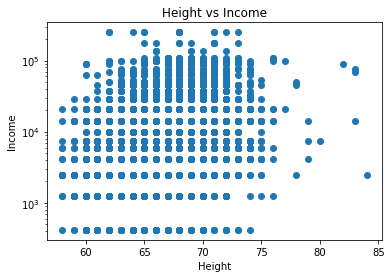

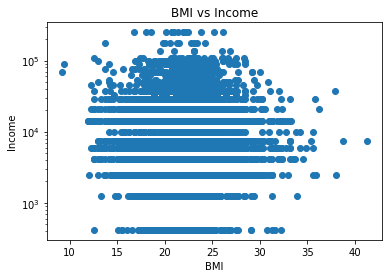

In [28]:
# your code here
plt.scatter(x=df2['age'], y=df2['income'])
plt.yscale('log')
plt.title("Age vs Income")
plt.xlabel("Age")
plt.ylabel("Income")

plt.figure()

plt.scatter(x=df2['height'], y=df2['income'])
plt.yscale('log')
plt.title("Height vs Income")
plt.xlabel("Height")
plt.ylabel("Income")

plt.figure()

plt.scatter(x=df2['bmi'], y=df2['income'])
plt.yscale('log')
plt.title("BMI vs Income")
plt.xlabel("BMI")
plt.ylabel("Income")

**INTERPRETATION:**

**There appears to be no clear linear or non-linear relationship between these variables and income.**


<div class='exercise-r'>  

**5.7** Is income lower or higher for those living in "nuclear" families?

</div>

Text(0.5, 1.0, 'Family Type vs Income, Nuclear is 1')

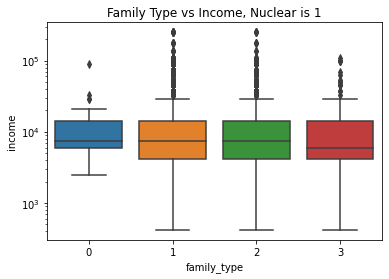

In [29]:
# your code here 
sns.boxplot(x=df2['family_type'], y=df2['income'])
plt.yscale('log')
plt.title("Family Type vs Income, Nuclear is 1")

**INTERPRETATION:**

**Nuclear families appear to have the same income as joint families and only slightly higher than those that identify as "other".**


<div class='exercise-r'>  

**5.8** What is the average effect of the "Manglik" variable on income?

</div>

Text(0.5, 1.0, 'Manglik Type vs Income')

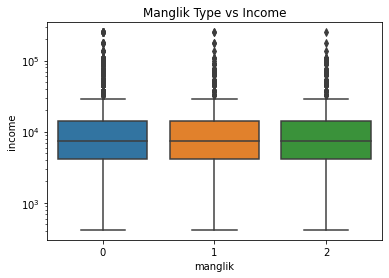

In [30]:
# your code here
sns.boxplot(x=df2['manglik'], y=df2['income'])
plt.yscale('log')
plt.title("Manglik Type vs Income")

**INTERPRETATION:**

**There is no impact on Manglik on the average income.**


<a id="part6questions"></a>

## <div class='exercise'><b>Question 6:  Calculate the Gini coefficient [15 pts]</b></div>

[Return to contents](#contents)


**Gini coefficients are often used to quantify income inequality.** For an introductory overview of the Gini coefficient, its derivation, and its uses, feel free to [read more about it here](https://en.wikipedia.org/wiki/Gini_coefficient). That article also provides [a useful graphical representation](https://en.wikipedia.org/wiki/File:Economics_Gini_coefficient2.svg) of the Gini coefficient to better understand how it measures inequality. 

The Gini coefficient is defined by the formula:

$$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini coefficient of $G=0$ implies perfect income equality, whereas a Gini coefficient close to $G=1$ implies a concentration of wealth among the richest few.

**6.1** Based on the above formula, calculate and report the Gini coefficient for the income of the participants in our SimplyMarry.com dataset.

- **NOTE:** For algorithmic simplicity and consistency, you can rank income values for all observations, keeping duplicate values in your sorted array. Therefore, you will likely have sorted income values $x_i$ similar to `[417, 417, 417, ..., 250000, 250000, 250000]` with corresponding rank indices $i$ similar to `[1, 2, 3, ..., 12353, 12354, 12355]`. Nothing more sophisticated than that is required for dealing with ties (i.e. duplicates) in your sorted income values for Question 6.1.

**6.2** Compare your Gini coefficient with Gini benchmark countries:

- According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the country with the largest Gini coefficient is South Africa, ranked 1st at $0.63$, while the lowest is Ukraine, ranked 159th at $0.25$. India (i.e. SimplyMarry.com's primary user base) is ranked 95th on the list and has a Gini index of $0.357$.


- Based on your calculated Gini coefficient value for this dataset, what is your conclusion on the relationship of the income disparity of SimplyMarry.com's user base compared to the three countries listed above?


- Do the data source, self-report nature of the data, or sampling procedure affect your conclusions? If so, how?

## Question 6: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

**Gini coefficients are often used to quantify income inequality.** For an introductory overview of the Gini coefficient, its derivation, and its uses, feel free to [read more about it here](https://en.wikipedia.org/wiki/Gini_coefficient). That article also provides [a useful graphical representation](https://en.wikipedia.org/wiki/File:Economics_Gini_coefficient2.svg) of the Gini coefficient to better understand how it measures inequality. 

The Gini coefficient is defined by the formula:

$$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini coefficient of $G=0$ implies perfect income equality, whereas a Gini coefficient close to $G=1$ implies a concentration of wealth among the richest few.

**6.1** Based on the above formula, calculate and report the Gini coefficient for the income of the participants in our SimplyMarry.com dataset.

- **NOTE:** For algorithmic simplicity and consistency, you can rank income values for all observations, keeping duplicate values in your sorted array. Therefore, you will likely have sorted income values $x_i$ similar to `[417, 417, 417, ..., 250000, 250000, 250000]` with corresponding rank indices $i$ similar to `[1, 2, 3, ..., 12353, 12354, 12355]`. Nothing more sophisticated than that is required for dealing with ties (i.e. duplicates) in your sorted income values for Question 6.1.

</div>

In [31]:
# your code here
g_income = df2.sort_values(by='income')['income']
n = len(g_income)

num = 0
den = 0
for i, g in enumerate(g_income):
    i + 1;
    num += ((2*i) - n - 1)*g
    den += g

G = num / (n*den)

print("The Gini coefficient for our dataset is ", G)


The Gini coefficient for our dataset is  0.49703778791928177


<div class='exercise-r'>  

**6.2** Compare your Gini coefficient with Gini benchmark countries:

- According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the country with the largest Gini coefficient is South Africa, ranked 1st at $0.63$, while the lowest is Ukraine, ranked 159th at $0.25$. India (i.e. SimplyMarry.com's primary user base) is ranked 95th on the list and has a Gini index of $0.357$.


- Based on your calculated Gini coefficient value for this dataset, what is your conclusion on the relationship of the income disparity of SimplyMarry.com's user base compared to the three countries listed above?


- Do the data source, self-report nature of the data, or sampling procedure affect your conclusions? If so, how?

</div>

**SimplyMarry.com's users have more income inequality than India as a country. This is likely due to a couple of factors. First, since this is a dating app, some users probably overinflate their incomes and this distorts the data. Secondly, the dataset of single individuals looking for love is likely not representative of all of India. There are also other likely considerations given access to technology, etc. In conclusion, this number is likely not an accurate predictor of greater population trends for India or even for the actual SimplyMarry population since the data was self-reported.**


<a id="part7questions"></a>

### <div class='exercise'><b>Question 7 (required for 209a students, optional for others): Multi-linear regression [10 pts]</b></div>

[Return to contents](#contents)

Now we increase the scope of our analysis to solve another problem that is related to income of our SimplyMarry.com users.


![](data/modi.png)

*Image Source: [The Economic Times](https://economictimes.indiatimes.com/news/politics-and-nation/you-can-run-but-cant-hide-modis-long-arm-reaches-out-for-tax-evaders/articleshow/62293002.cms)*

### Problem Description

Owing to a large number of people underreporting their income to evade taxes, as [reported by The Economic Times in 2017](https://economictimes.indiatimes.com/news/politics-and-nation/you-can-run-but-cant-hide-modis-long-arm-reaches-out-for-tax-evaders/articleshow/62293002.cms), the Income Tax Department of India wants you, an esteemed data scientist, to build a machine learning model that can predict the income of a given tax-payer based on information commonly available on SimplyMarry.com.

This will help the department flag suspected individuals who may show discernable trends of earing high values of income but are excessively under-reporting on their annual income.

The goal is to build the best model with the given SimplyMarry.com dataset, using both the categorical and quantitative predictors available in this dataset.

As with all other homework problems, this is a learning exercise. And, as absurd or problematic as it might seem to use SimplyMarry.com data for this purpose, in the real world, it will be your decision to choose the types of data science projects on which you will work as well as the clients with which you will work. 

### Deliverables

To accomplish this task, we will fit a multiple linear regression model to the training set.

Use the `sklearn` library. Your code should be contained in a Jupyter notebook cell.  An appropriate level of code comments are necessary.  Your code should run and output the required outputs described below.

### Required Outputs

- Fit a multiple linear regression model on the training set and predict on the train and test sets.
- Report the $MSE$ for the train and test set.
- Report the $R^2$ score on the test set.
- Make a plot of residuals vs. log of predicted values $\hat{y}$, with residuals on the $y$-axis and predicted values on the $x$-axis. Use the formula ${\epsilon} = y - \hat{y}$ to compute the residual values. Include a horizontal line denoting the zero residual value on the $y$-axis.
- Plot a histogram of the residuals values.
- Be certain to provide a written interpretation of your findings and any important aspects of your modeling approach of which you'd want the teaching staff to be aware, particularly if you attempt any optional outputs as mentioned below.

### Optional Outputs

You are encouraged to experiment with ways to improve your model *after first reporting results with only the required outputs*. Some ideas are given below:

- Polynomial terms for continous variables,
- Interaction terms between variables,
- Feature selection among given predictors.


## Question 7: Solutions 

[Return to contents](#contents)

For the predictors:  ['gender', 'family_type', 'status', 'education', 'city']
The MSE for train is  183386084.7456521  and for test is  236031042.30690452
The R2 value is  0.32677807089320177


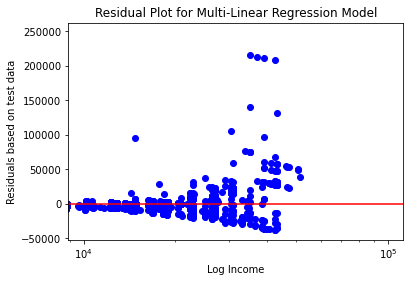

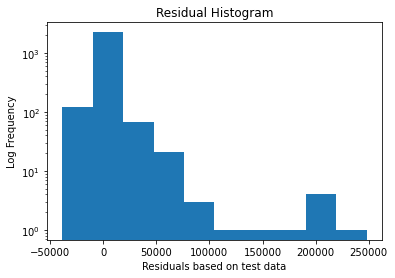

In [32]:
# your code here

# List of all the best predictors to fit the curve
cols = [['gender', 'family_type', 'status', 'education', 'city']]

# Loop over all the predictor combinations 
for i in cols:

    # Set each of the predictors from the previous list as x
    x = df2[i]
    
    
    # Set the "income" column as the reponse variable
    y = df2['income']
    
   
    # Split the data into train-test sets with 80% training data and 20% testing data. 
    # Set random_state as 0
    x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=109)

    # Initialize a Linear Regression model
    lreg = LinearRegression()

    # Fit the linear model on the train data
    lreg.fit(x_train,y_train)
    
    # Predict the response variable for the test set using the trained model
    y_pred_train = lreg.predict(x_train)
    y_pred_test = lreg.predict(x_test)
    
    # Compute the MSE for the test data
    MSE_train = mean_squared_error(y_train, y_pred_train)
    MSE_test = mean_squared_error(y_test, y_pred_test)
    
    # Calculate r2
    r2 = r2_score(y_test, y_pred_test)
    
    print("For the predictors: ", i)
    print("The MSE for train is ", MSE_train, " and for test is ", MSE_test)
    print("The R2 value is ", r2)
    
    # Calculate the residual values for the model
    residuals = y_test-y_pred_test
    
    plt.scatter(y_pred_test, residuals, color='blue')
    plt.axhline(color='red')
    plt.xscale('log')
    plt.title("Residual Plot for Multi-Linear Regression Model")
    plt.ylabel('Residuals based on test data');
    plt.xlabel('Log Income');
    
    plt.figure();
    
    plt.title("Residual Histogram")
    plt.ylabel('Log Frequency');
    plt.xlabel('Residuals based on test data');
    plt.yscale('log')
    plt.hist(residuals)

**INTERPRETATION:**

**We selected the predictor variables based off the exploratory data analysis that we did in earlier questions. We chose variables that showed a correlation with income. Looking at our results, we see that we have large MSE values which means that our model has a high degree of error and variance, meaning that our estimates will vary from the observed y-values. The biggest takeaway from this is comparing the test and train MSEs. Neither are close to zero which means our model is not overfitting. Next, looking at our R2 value our score indicates that the linear relationship between our predictors and income is not very strong. Looking at the distribution of the residuals our residuals are positively skewed. This means that our model is not good at accurately predicting large values of income. This also means that our linear model may not hold for larger values of income. Looking at the scatterplot of the residuals, our insights are only further confirmed. Our residuals are concentrated around the y=0 horizontal which shows good model fit, however at larger values of income the model does not hold as well. Again in this plot we see a skew towards higher residuals with larger values of income. This might show that our error is not random but with the model that we chose. A way to improve our model is to investigate polynomial functions and other combination of predictors.**


## 